<a href="https://colab.research.google.com/github/c3Zor/jupyter_lab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images ar not 28x28"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images ar not 28x28"

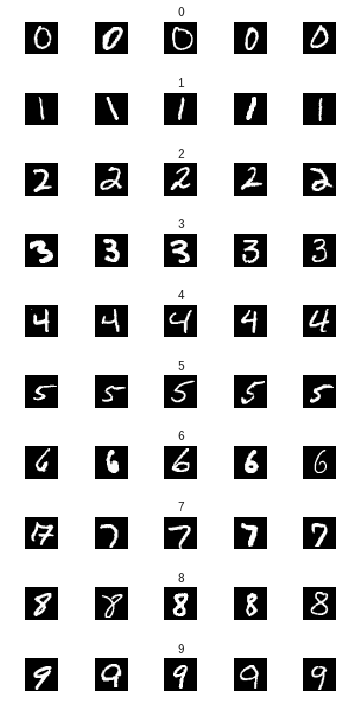

In [0]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


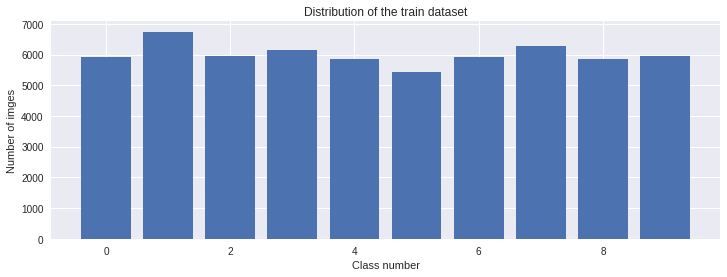

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title('Distribution of the train dataset')
plt.xlabel('Class number')
plt.ylabel('Number of imges')
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28 ,1)
X_test = X_test.reshape(10000, 28, 28 ,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
# define the lenet model function
def leNet_model():
  model = Sequential()
  # using Conv2D to defining convelutional filtes using 30 filters
  # 5x5 filters, input shape is from 28x28x1 image size
  # and using relu funcion to denote negative values this
  # layer has 780 adjustable parameters 5x5matrix x 30 conv filters
  # and 30 bias. using paddind to not loose the information at the borders
  # strides is the strides between convelutions
  model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation='relu')) #activation="relu", strides=, padding= ))
  # pooing scales convelutional layer to a smaller one 
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2446 - acc: 0.9219 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 2/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0696 - acc: 0.9792 - val_loss: 0.0399 - val_acc: 0.9875
Epoch 3/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0562 - acc: 0.9832 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 4/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0475 - acc: 0.9854 - val_loss: 0.0426 - val_acc: 0.9897
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0448 - acc: 0.9860 - val_loss: 0.0408 - val_acc: 0.9890
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0418 - acc: 0.9871 - val_loss: 0.0365 - val_acc: 0.9905
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0393 - acc: 0.9882 - val_loss: 0.0319 - val_acc:

In [0]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

Text(0.5,0,'epochs')

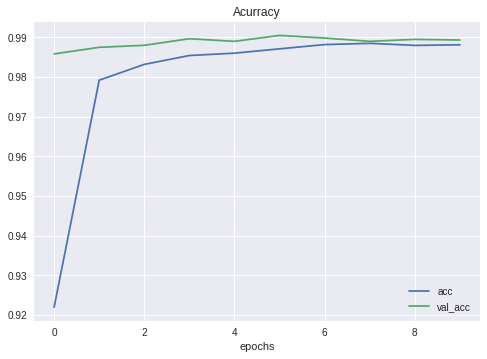

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Acurracy')
plt.xlabel('epochs')

Text(0.5,0,'epochs')

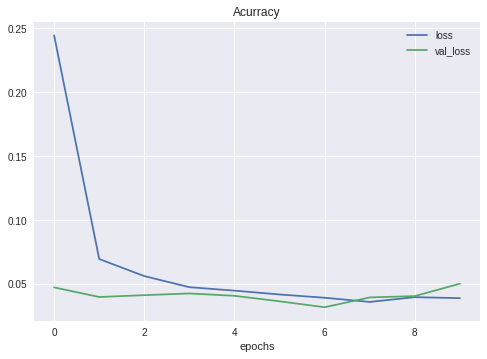

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Acurracy')
plt.xlabel('epochs')

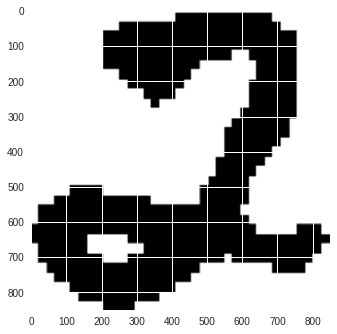

In [0]:
import requests
from PIL import Image

url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [0]:
import requests
url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
response = requests.get(url, stream=True)
print(response)

<Response [200]>


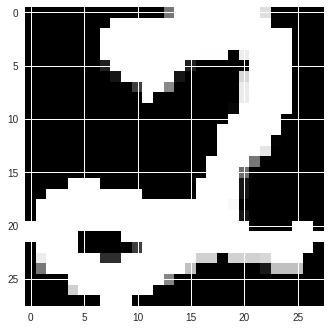

In [0]:
import cv2
img = np.asarray(img)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img/255
img = img.reshape(1,28,28,1)

In [0]:
prediction = model.predict_classes(img)
print('Predicted digit', str(prediction))

Predicted digit [2]


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy', score[1])

<class 'list'>
Test score: 0.04633081381922375
Test accuracy 0.989


In [0]:
# model requires 2 args first defines all input
# defines second output
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)


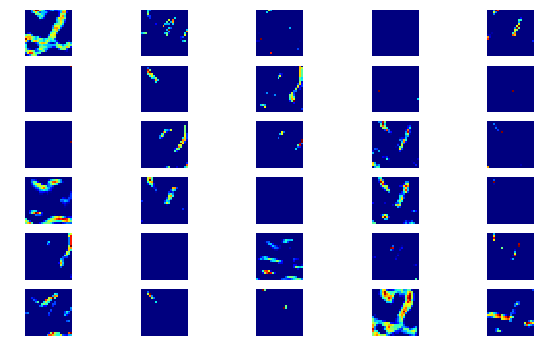

In [0]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

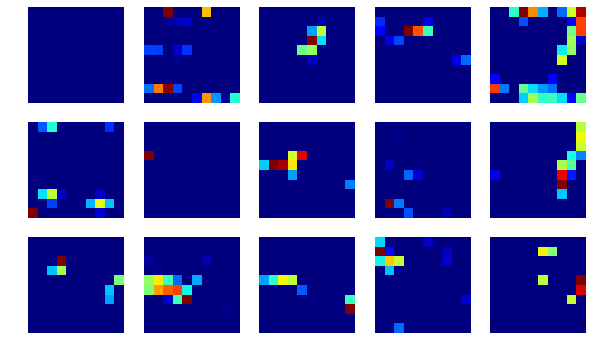

In [0]:
 plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')